Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

Reading the data

In [2]:
data = pd.read_csv("./Data/epi_r.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [4]:
data.head(5)

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,20052.0,3.714467,1.340829,0.0,3.75,4.375,4.375,5.0
calories,15935.0,6322.958017,359046.041242,0.0,198.00,331.000,586.000,30111218.0
protein,15890.0,100.160793,3840.318527,0.0,3.00,8.000,27.000,236489.0
fat,15869.0,346.877497,20456.106859,0.0,7.00,17.000,33.000,1722763.0
sodium,15933.0,6225.974895,333318.188891,0.0,80.00,294.000,711.000,27675110.0
...,...,...,...,...,...,...,...,...
cookbooks,20052.0,0.000150,0.012231,0.0,0.00,0.000,0.000,1.0
leftovers,20052.0,0.000349,0.018681,0.0,0.00,0.000,0.000,1.0
snack,20052.0,0.001396,0.037343,0.0,0.00,0.000,0.000,1.0
snack week,20052.0,0.000948,0.030768,0.0,0.00,0.000,0.000,1.0


In [8]:
for column in data.columns:
    print(column)

title
rating
calories
protein
fat
sodium
#cakeweek
#wasteless
22-minute meals
3-ingredient recipes
30 days of groceries
advance prep required
alabama
alaska
alcoholic
almond
amaretto
anchovy
anise
anniversary
anthony bourdain
aperitif
appetizer
apple
apple juice
apricot
arizona
artichoke
arugula
asian pear
asparagus
aspen
atlanta
australia
avocado
back to school
backyard bbq
bacon
bake
banana
barley
basil
bass
bastille day
bean
beef
beef rib
beef shank
beef tenderloin
beer
beet
bell pepper
berry
beverly hills
birthday
biscuit
bitters
blackberry
blender
blue cheese
blueberry
boil
bok choy
bon appétit
bon app��tit
boston
bourbon
braise
bran
brandy
bread
breadcrumbs
breakfast
brie
brine
brisket
broccoli
broccoli rabe
broil
brooklyn
brown rice
brownie
brunch
brussel sprout
buffalo
buffet
bulgaria
bulgur
burrito
butter
buttermilk
butternut squash
butterscotch/caramel
cabbage
cake
california
calvados
cambridge
campari
camping
canada
candy
candy thermometer
cantaloupe
capers
caraway
cardamom


Handling missing values

In [13]:
data.isna().sum()

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

In [15]:
data["title"].isna().sum()

0

In [16]:
data.select_dtypes(include = "object").columns

Index(['title'], dtype='object')

In [18]:
na_cols = data.columns[data.isna().any()].tolist()

In [19]:
for col in na_cols:
    data[col].fillna(data[col].mean(), inplace = True)

In [20]:
data.isna().sum()

title         0
rating        0
calories      0
protein       0
fat           0
             ..
cookbooks     0
leftovers     0
snack         0
snack week    0
turkey        0
Length: 680, dtype: int64

Since there are so much columns in the dataset, I am dropping some of the columns so that it contains relevant information.

In [25]:
reduced_data = data[["title", "rating", "calories", "protein", "fat", "sodium", "christmas", "birthday", "thanksgiving", "anniversary", "summer", "halloween", "easter", "new year's day", "valentine's day", "cinco de mayo", "hanukkah", "chicken", "beef", "pork", "seafood", "vegetable", "fruit", "dairy", "egg", "legume", "nut", "spice", "herb", "title", "beer", "wine", "vodka", "whiskey", "rum", "gin", "cocktail", "italy", "japan", "mexico", "france", "alabama", "texas", "california", "new york"]]

In [26]:
reduced_data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,20052.0,3.714467,1.340829,0.0,3.75,4.375,4.375,5.0
calories,20052.0,6322.958017,320069.676264,0.0,229.00,445.000,1240.000,30111218.0
protein,20052.0,100.160793,3418.593885,0.0,4.00,15.000,73.000,236489.0
fat,20052.0,346.877497,18197.681561,0.0,10.00,24.000,82.000,1722763.0
sodium,20052.0,6225.974895,297116.071238,0.0,123.00,466.500,1914.500,27675110.0
christmas,20052.0,0.051815,0.221659,0.0,0.00,0.000,0.000,1.0
birthday,20052.0,0.009625,0.097636,0.0,0.00,0.000,0.000,1.0
thanksgiving,20052.0,0.072711,0.259668,0.0,0.00,0.000,0.000,1.0
anniversary,20052.0,0.005536,0.074197,0.0,0.00,0.000,0.000,1.0
summer,20052.0,0.207012,0.405174,0.0,0.00,0.000,0.000,1.0


Let's start visualization

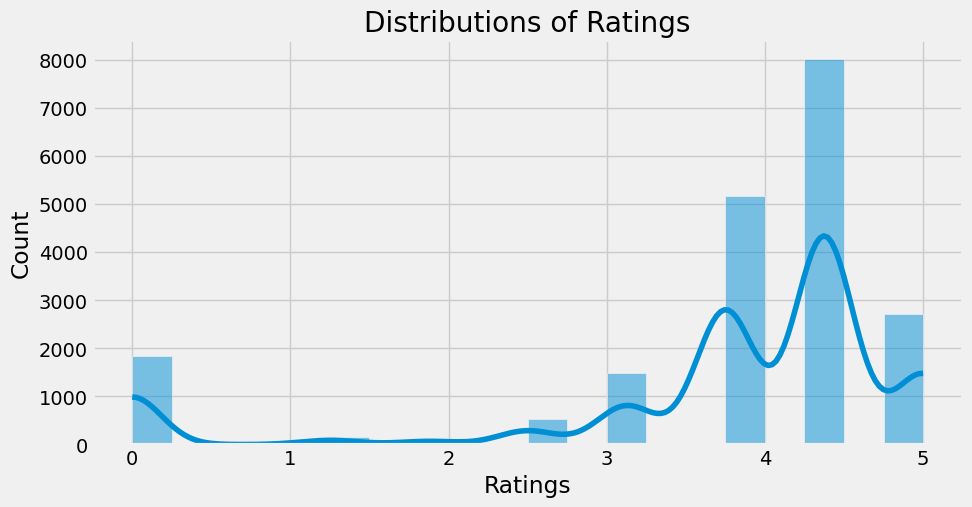

In [56]:
plt.figure(figsize = (10, 5))
sns.histplot(reduced_data["rating"], kde = True, bins = 20)
plt.title("Distributions of Ratings")
plt.xlabel("Ratings")
plt.show()

From above figure we can say that :
<ul>
    <li>Most of the recipes have ratings around 4.5</li>
    <li>Around 500 recipes have ratings between 3 and 3.3</li>
    <li>Around 2000 recipes have 0 ratings</li>
    <li>Around 3800 recipes have 5 ratings</li>
</ul>

In [55]:
food_type = []

for index, row in reduced_data.iterrows():
    if (row["chicken"] == 1) or (row["beef"] == 1) or (row["pork"] == 1) or (row["seafood"] == 1) or (row["egg"] == 1):
        food_type.append("Non-veg")
    else:
        food_type.append("Veg")

reduced_data["food_type"] = food_type

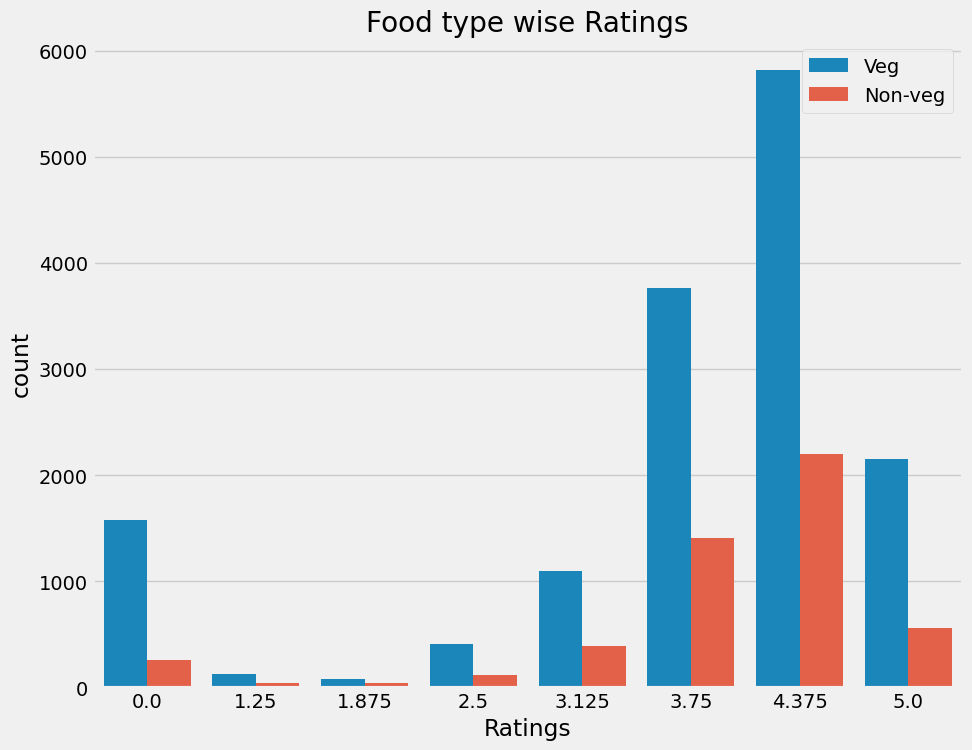

In [62]:
plt.figure(figsize = (10, 8))
sns.countplot(x = reduced_data["rating"], hue = reduced_data["food_type"])
plt.title("Food type wise Ratings")
plt.xlabel("Ratings")
plt.legend()
plt.show()

From above figure we can say that :
<ul>
    <li>Most of the Ratings around 4 are given to Vegetarian food</li>
</ul>

In [102]:
labels = ["Beer", "Wine", "Vodka", "Whiskey", "Rum", "Cocktail"]
ratios = [
    len(reduced_data[reduced_data["food_type"] == "Non-veg"][reduced_data["beer"] == 1]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]) * 100,
    len(reduced_data[reduced_data["food_type"] == "Non-veg"][reduced_data["wine"] == 1]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]) * 100,
    len(reduced_data[reduced_data["food_type"] == "Non-veg"][reduced_data["vodka"] == 1]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]) * 100,
    len(reduced_data[reduced_data["food_type"] == "Non-veg"][reduced_data["whiskey"] == 1]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]) * 100,
    len(reduced_data[reduced_data["food_type"] == "Non-veg"][reduced_data["rum"] == 1]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]) * 100,
    len(reduced_data[reduced_data["food_type"] == "Non-veg"][reduced_data["cocktail"] == 1]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]) * 100
]
fig = px.pie(values = ratios, names = labels, title = "Alcohols preferred with Non-veg food")
fig.show()

In [103]:
labels = ["Beer", "Wine", "Vodka", "Whiskey", "Rum", "Cocktail"]
ratios = [
    len(reduced_data[reduced_data["food_type"] == "Veg"][reduced_data["beer"] == 1]) / len(reduced_data[reduced_data["food_type"] == "Veg"]) * 100,
    len(reduced_data[reduced_data["food_type"] == "Veg"][reduced_data["wine"] == 1]) / len(reduced_data[reduced_data["food_type"] == "Veg"]) * 100,
    len(reduced_data[reduced_data["food_type"] == "Veg"][reduced_data["vodka"] == 1]) / len(reduced_data[reduced_data["food_type"] == "Veg"]) * 100,
    len(reduced_data[reduced_data["food_type"] == "Veg"][reduced_data["whiskey"] == 1]) / len(reduced_data[reduced_data["food_type"] == "Veg"]) * 100,
    len(reduced_data[reduced_data["food_type"] == "Veg"][reduced_data["rum"] == 1]) / len(reduced_data[reduced_data["food_type"] == "Veg"]) * 100,
    len(reduced_data[reduced_data["food_type"] == "Veg"][reduced_data["cocktail"] == 1]) / len(reduced_data[reduced_data["food_type"] == "Veg"]) * 100
]
fig = px.pie(values = ratios, names = labels, title = "Alcohols preferred with Veg food")
fig.show()

From above figures we can say that :
<ul>
    <li>Most of the users prefer Cocktails with Veg food</li>
    <li>Most of the users prefer Rum with Non-veg food</li>
</ul>

In [104]:
labels = ["Italy", "Japan", "Mexico", "France", "Alabama", "Texas", "California", "New york"]
ratios = [
    len(reduced_data[reduced_data["italy"] == 1][reduced_data["food_type"] == "Non-veg"]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]),
    len(reduced_data[reduced_data["japan"] == 1][reduced_data["food_type"] == "Non-veg"]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]),
    len(reduced_data[reduced_data["mexico"] == 1][reduced_data["food_type"] == "Non-veg"]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]),
    len(reduced_data[reduced_data["france"] == 1][reduced_data["food_type"] == "Non-veg"]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]),
    len(reduced_data[reduced_data["alabama"] == 1][reduced_data["food_type"] == "Non-veg"]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]),
    len(reduced_data[reduced_data["texas"] == 1][reduced_data["food_type"] == "Non-veg"]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]),
    len(reduced_data[reduced_data["california"] == 1][reduced_data["food_type"] == "Non-veg"]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"]),
    len(reduced_data[reduced_data["new york"] == 1][reduced_data["food_type"] == "Non-veg"]) / len(reduced_data[reduced_data["food_type"] == "Non-veg"])
]
fig = px.pie(values = ratios, names = labels, title = "Non-veg Consumers percentage as per different Countries")
fig.show()

In [105]:
labels = ["Italy", "Japan", "Mexico", "France", "Alabama", "Texas", "California", "New york"]
ratios = [
    len(reduced_data[reduced_data["italy"] == 1][reduced_data["food_type"] == "Veg"]) / len(reduced_data[reduced_data["food_type"] == "Veg"]),
    len(reduced_data[reduced_data["japan"] == 1][reduced_data["food_type"] == "Veg"]) / len(reduced_data[reduced_data["food_type"] == "Veg"]),
    len(reduced_data[reduced_data["mexico"] == 1][reduced_data["food_type"] == "Veg"]) / len(reduced_data[reduced_data["food_type"] == "Veg"]),
    len(reduced_data[reduced_data["france"] == 1][reduced_data["food_type"] == "Veg"]) / len(reduced_data[reduced_data["food_type"] == "Veg"]),
    len(reduced_data[reduced_data["alabama"] == 1][reduced_data["food_type"] == "Veg"]) / len(reduced_data[reduced_data["food_type"] == "Veg"]),
    len(reduced_data[reduced_data["texas"] == 1][reduced_data["food_type"] == "Veg"]) / len(reduced_data[reduced_data["food_type"] == "Veg"]),
    len(reduced_data[reduced_data["california"] == 1][reduced_data["food_type"] == "Veg"]) / len(reduced_data[reduced_data["food_type"] == "Veg"]),
    len(reduced_data[reduced_data["new york"] == 1][reduced_data["food_type"] == "Veg"]) / len(reduced_data[reduced_data["food_type"] == "Veg"])
]
fig = px.pie(values = ratios, names = labels, title = "Veg Consumers percentage as per different Countries")
fig.show()

From above figure we can say that :
<ul>
    <li>Most of the Consumers for both veg and Non-veg food are from California</li>
</ul>

In [117]:
labels = ["christmas", "thanksgiving", "halloween", "easter", "valentine's day"]
ratios = [reduced_data[col].sum() for col in labels]
fig = px.pie(values = ratios, names = labels, title = "Recipes as per different Ocassions")
fig.show()

In [122]:
labels = ["christmas", "thanksgiving", "halloween", "easter", "valentine's day"]
ratios = [reduced_data[reduced_data["food_type"] == "Non-veg"][col].sum() / len([reduced_data["food_type"] == "Non-veg"]) * 100 for col in labels]
fig = px.pie(values = ratios, names = labels, title = "Non-veg Recipes as per different Ocassions")
fig.show()

In [123]:
labels = ["christmas", "thanksgiving", "halloween", "easter", "valentine's day"]
ratios = [reduced_data[reduced_data["food_type"] == "Veg"][col].sum() / len([reduced_data["food_type"] == "Veg"]) * 100 for col in labels]
fig = px.pie(values = ratios, names = labels, title = "Veg Recipes as per different Ocassions")
fig.show()

From above figure we can say that :
<ul>
    <li>Most of the Recipes are for Thanksgiving</li>
    <li>Most of the Non-veg Recipes are for Chistmas</li>
    <li>Most of the Veg Recipes are for Thanksgiving</li>
</ul>